In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
review_df = pd.read_csv("/content/Reviews.csv")

# What is in the data-file (shape and information in the columns)?
print(review_df.shape)
review_df.head()

(16243, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
review_df['Text'].values[3]

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'

In [ ]:
review_df['Summary'].values[3]

'Cough Medicine'

In [ ]:
review_df["Score"]

0        5.0
1        1.0
2        4.0
3        2.0
4        5.0
        ... 
16238    3.0
16239    4.0
16240    5.0
16241    5.0
16242    NaN
Name: Score, Length: 16243, dtype: float64

Text(0, 0.5, 'Counts')

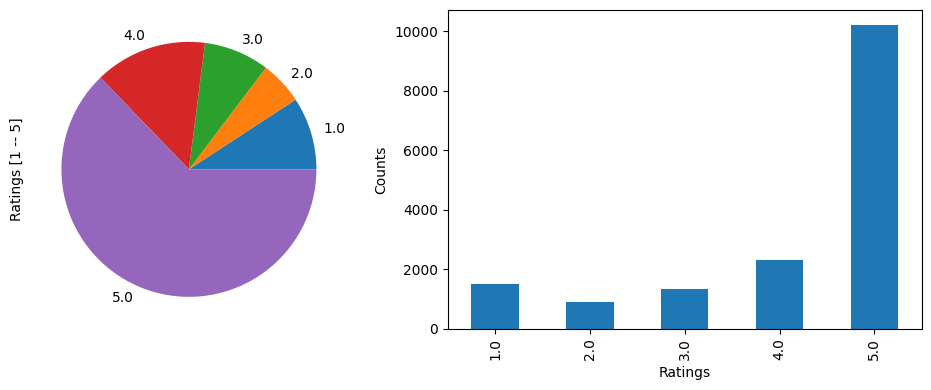

In [ ]:
fig1, ax = plt.subplots(1, 2, figsize=(10, 4), tight_layout = True) # --> (rows=1, columns=2)

# Plot command option
# review_df["Score"].value_counts().sort_index().plot(kind = "pie", figsize = (8,4))
# review_df["Score"].value_counts().sort_index().plot(kind = "bar", figsize = (8,4))
plt.subplot(1,2,1)
review_df["Score"].value_counts().sort_index().plot.pie()
ax[0].set_ylabel("Ratings [1 -- 5]")

plt.subplot(1,2,2)
review_df["Score"].value_counts().sort_index().plot.bar()
ax[1].set_xlabel("Ratings")
ax[1].set_ylabel("Counts")

In [ ]:
import nltk

In [ ]:
some_random_review = review_df['Text'].values[100]
print(some_random_review)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.


In [ ]:
nltk.download('punkt')

tokens = nltk.word_tokenize(some_random_review) # Defined in provious frame
display(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['The',
 'mouth',
 'says',
 ',',
 '``',
 'How',
 'do',
 'I',
 'love',
 'thee',
 ',',
 'let',
 'me',
 'count',
 'the',
 'ways',
 '...',
 "''",
 '<',
 'br',
 '/',
 '>',
 'If',
 'you',
 'like',
 'apple',
 'products',
 'a',
 'must',
 'have',
 'item',
 '.',
 'The',
 'only',
 'draw',
 'back',
 ',',
 'shipping',
 'cost',
 '.',
 'These',
 'are',
 'very',
 'heavy',
 '.']

In [ ]:
nltk.download('averaged_perceptron_tagger')


tagged_words = nltk.pos_tag(tokens) # Its a tuple with word and tag!
tagged_words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('count', 'VB'),
 ('the', 'DT'),
 ('ways', 'NNS'),
 ('...', ':'),
 ("''", "''"),
 ('<', 'VBZ'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('If', 'IN'),
 ('you', 'PRP'),
 ('like', 'VBP'),
 ('apple', 'NN'),
 ('products', 'NNS'),
 ('a', 'DT'),
 ('must', 'MD'),
 ('have', 'VB'),
 ('item', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('only', 'JJ'),
 ('draw', 'NN'),
 ('back', 'RB'),
 (',', ','),
 ('shipping', 'VBG'),
 ('cost', 'NN'),
 ('.', '.'),
 ('These', 'DT'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('heavy', 'JJ'),
 ('.', '.')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


# Chunk and print that chunk
nltk.chunk.ne_chunk(tagged_words).pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  The/DT
  mouth/NN
  says/VBZ
  ,/,
  ``/``
  How/WRB
  do/VB
  I/PRP
  love/VB
  thee/NN
  ,/,
  let/VB
  me/PRP
  count/VB
  the/DT
  ways/NNS
  .../:
  ''/''
  </VBZ
  br/NN
  //NNP
  >/NNP
  If/IN
  you/PRP
  like/VBP
  apple/NN
  products/NNS
  a/DT
  must/MD
  have/VB
  item/NN
  ./.
  The/DT
  only/JJ
  draw/NN
  back/RB
  ,/,
  shipping/VBG
  cost/NN
  ./.
  These/DT
  are/VBP
  very/RB
  heavy/JJ
  ./.)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Requirement: vader_lexicon, the vocabulary:
nltk.download('vader_lexicon')


# Define the SentimentIntensityAnalyzer object
si_analizer = SentimentIntensityAnalyzer()

si_analizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
s1 = 'You do not look happy.'
s2 = 'You look happy.'
s3 = "He seemed Okay, I think!"
s4 = "I am on my way to the class."

si_analizer.polarity_scores(s1) # --> will give you dictionary for +ve, -ve, 0s, scores

print(si_analizer.polarity_scores(s1))
print(si_analizer.polarity_scores(s2))
print(si_analizer.polarity_scores(s3))
print(si_analizer.polarity_scores(s4))

{'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4585}
{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.2942}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
review_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
review_score = {}
for i, each_row in tqdm(review_df.iterrows(), total=len(review_df)):
    review_text = each_row['Text']
    cid         = each_row['Id']
    review_score[cid]  = si_analizer.polarity_scores(review_text)

  0%|          | 0/16243 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
list(review_score.items())[:10]

[(1, {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}),
 (2, {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}),
 (3, {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}),
 (4, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}),
 (5, {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}),
 (6, {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}),
 (7, {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}),
 (8, {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}),
 (9, {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}),
 (10, {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313})]

In [ ]:
result_df = pd.DataFrame(review_score)

In [ ]:
result_df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,16233,16234,16235,16236,16237,16238,16239,16240,16241,16242
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.1920,0.0000,0.0000,0.0830,0.0680,0.0000,0.1250,0.2130,0.0000,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.5840,0.7160,0.6850,0.6460,0.7990,0.6430,0.8750,0.7210,0.6790,0.6070
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2230,0.2840,0.3150,0.2710,0.1320,0.3570,0.0000,0.0660,0.3210,0.3930
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.2259,0.8591,0.8786,0.7262,0.6787,0.9773,-0.2803,-0.7281,0.9522,0.9061


In [ ]:
result_df = result_df.T
result_df.head(10)

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
6,0.029,0.809,0.163,0.8830
7,0.034,0.693,0.273,0.9346
8,0.000,0.520,0.480,0.9487
9,0.000,0.851,0.149,0.6369
10,0.000,0.705,0.295,0.8313


In [ ]:
sample_result_df = result_df.head(1000)
sample_result_df

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [ ]:
result_df.compound.describe()

count    16242.000000
mean         0.644513
std          0.468154
min         -0.988200
25%          0.572775
50%          0.851900
75%          0.939200
max          0.999700
Name: compound, dtype: float64

In [ ]:
result_df.neg.describe()

count    16242.000000
mean         0.042691
std          0.052591
min          0.000000
25%          0.000000
50%          0.028000
75%          0.067000
max          0.401000
Name: neg, dtype: float64

In [ ]:
sample_review_df = review_df.head(1000)

sample_result_df = sample_result_df.reset_index().rename(columns={'index': 'Id'})
sample_result_df

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788
996,997,0.000,0.786,0.214,0.9309
997,998,0.000,0.673,0.327,0.9634
998,999,0.063,0.874,0.062,-0.0129


In [ ]:
sample_final_df = sample_result_df.merge(review_df, how='left')

sample_final_df

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1.0,1.0,5.0,1.331856e+09,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1.0,1.0,5.0,1.328141e+09,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1.0,1.0,5.0,1.324253e+09,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1.0,2.0,1.0,1.336090e+09,Not Hot,Not hot at all. Like the other low star review...


Text(0.5, 1.0, 'Sentiment-Intensity-Scores of the reviews (Compound-score)')

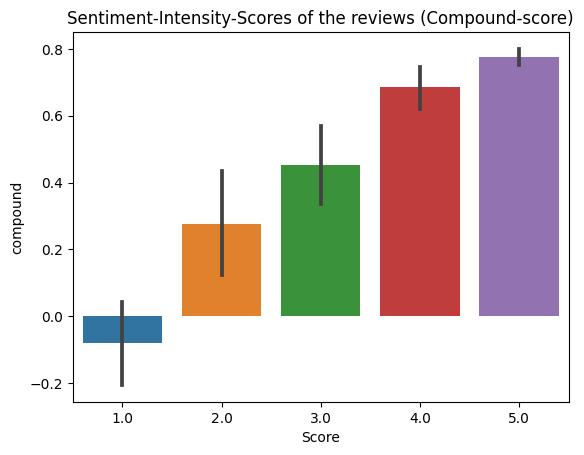

In [ ]:
ax = sns.barplot(data=sample_final_df, x = "Score", y='compound')
ax.set_title('Sentiment-Intensity-Scores of the reviews (Compound-score)')

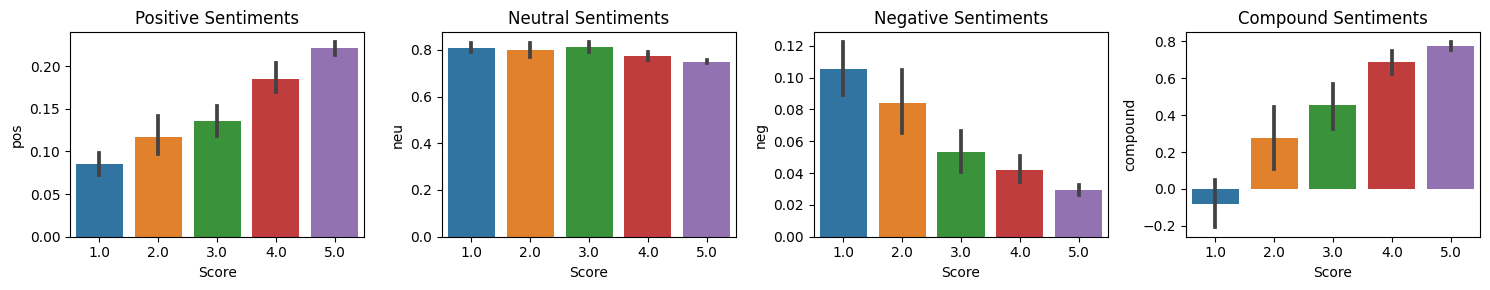

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

sns.barplot(data=sample_final_df, x = sample_final_df.Score, y='pos', ax=axs[0])
sns.barplot(data=sample_final_df, x = sample_final_df.Score, y='neu', ax=axs[1])
sns.barplot(data=sample_final_df, x = sample_final_df.Score, y='neg', ax=axs[2])
sns.barplot(data=sample_final_df, x = sample_final_df.Score, y='compound', ax=axs[3])

axs[0].set_title('Positive Sentiments')
axs[1].set_title('Neutral Sentiments')
axs[2].set_title('Negative Sentiments')
axs[3].set_title('Compound Sentiments')

plt.tight_layout()

In [ ]:
nltk.download('averaged_perceptron_tagger', download_dir = '/content')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /content...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
file_path = "taggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle"

# Read the pickled file into a Pandas DataFrame
pick_df = pd.read_pickle(file_path)

# Display the DataFrame
pick_df

({'i-1 suffix ity': {'MD': -0.816,
   'VB': -0.695,
   'NNPS': 1.837,
   'VBG': -1.139,
   'JJ': -1.628,
   'NN': -1.09,
   'VBD': -1.849,
   'NNS': -1.73,
   'FW': -0.608,
   'POS': 0.816,
   'WDT': -0.173,
   'RBR': 0.66,
   'VBP': 3.328,
   'VBN': 1.01,
   'EX': -0.409,
   'RB': 2.0,
   'IN': 0.135,
   'RP': -1.153,
   'DT': -0.759,
   'VBZ': 0.412,
   'NNP': 1.852},
  'i word inventiveness': {'VB': -0.961,
   'NNS': -0.983,
   'NN': 2.74,
   'RB': -0.796},
  'i-1 word tottering': {'RP': -1.216, 'RB': 1.216},
  'i word memo': {'VBZ': -0.611,
   'NNS': -0.64,
   'NN': 1.768,
   'RB': -0.371,
   'NNP': -0.146},
  'i+1 word budgets': {'VB': -0.603,
   'VBG': 0.865,
   'JJ': 0.54,
   'NN': -1.405,
   'JJR': 0.603},
  'i+2 word rein': {'VBN': -2.223, 'JJ': 2.223},
  'i-2 word foundation': {'RB': 2.121,
   'VBD': -0.972,
   'VBN': 0.972,
   'CD': -0.765,
   'JJ': -0.966,
   'NNS': -0.39},
  'i-1 tag+i word TO glean': {'VB': 0.114, 'JJ': -0.114},
  'i-1 suffix its': {'VB': -0.646,
   'NNPS